In [31]:
import gmplot
import pandas as pd
import requests 
import os
import math
from xml.etree.ElementTree import fromstring, ElementTree
from datetime import datetime
import json
import statistics 
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import numpy as np


In [2]:
TrafficEvents = None

chunk_size = 1000

BASE_PATH = "/home/amin/CETI/RoadConstruction/TrafficEventData/part/speeds/speed_"
    
index_folder = 0
index_start_point_file = 0
index_end_point_file = 411

In [3]:
def read_data(path):
    data = None
    data = pd.read_csv(path)
    return data

In [4]:
def read_part_data(folder_id, index_start, index_end):
    df = None
    print("start time is {}".format(datetime.now()))
    for i in range(index_start, index_end):
        type_of_ways_all_points = []
        path = BASE_PATH + str(folder_id) + "/" + str(i) + "_file_"+ str(i) + ".csv"

        data = read_data(path)
        df = data.append(df, ignore_index = True)
    print("end time is {}".format(datetime.now()))
    return df

In [5]:
df = None
for i in range(0,9):
    print(i)
    data = read_part_data(i, 0, 411)
    df = data.append(df, ignore_index = True)
print(9)
data = read_part_data(9, 0, 393)
df = data.append(df, ignore_index = True)

0
start time is 2020-09-25 21:59:24.353968
end time is 2020-09-25 22:00:59.822822
1
start time is 2020-09-25 22:01:00.126673
end time is 2020-09-25 22:02:28.166735
2
start time is 2020-09-25 22:02:28.939176
end time is 2020-09-25 22:03:58.447857
3
start time is 2020-09-25 22:03:59.627946
end time is 2020-09-25 22:05:33.190956
4
start time is 2020-09-25 22:05:35.059675
end time is 2020-09-25 22:07:19.316663
5
start time is 2020-09-25 22:07:21.664505
end time is 2020-09-25 22:09:05.569164
6
start time is 2020-09-25 22:09:09.097522
end time is 2020-09-25 22:10:48.551448
7
start time is 2020-09-25 22:10:51.506116
end time is 2020-09-25 22:12:24.781122
8
start time is 2020-09-25 22:12:28.774657
end time is 2020-09-25 22:14:05.560081
9
start time is 2020-09-25 22:14:09.673765
end time is 2020-09-25 22:15:36.945892


In [6]:
df.head(10)

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Circle,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta
0,M-29450881,MapQuest,Construction,406.0,3,44.309494,-90.840271,NaN,NaN,0.86,...,False,False,"{'waypoints': [{'nodes': [2147408021, 47184371...","{'waypoints': [{'nodes': [2147408021, 47184371...","[2147408021, 471843710, 2147408024, 2147408021...","[2147408021, 471843710, 2147408024, 2147408021...",motorway_link,-100.0,-100.0,-100.0
1,M-29450890,MapQuest,Construction,703.0,2,44.387669,-88.720055,NaN,NaN,0.12,...,False,False,"{'waypoints': [{'nodes': [232006634, 232006479...","{'waypoints': [{'nodes': [232006634, 232006479...","[232006634, 232006479, 2281677742, 232006634, ...","[232006634, 232006479, 2281677742, 232006634, ...",trunk,-100.0,-100.0,-100.0
2,M-29450891,MapQuest,Construction,703.0,2,44.403862,-88.734856,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [232006387, 232006382...","{'waypoints': [{'nodes': [232006387, 232006382...","[232006387, 232006382, 232006382, 231764181, 2...","[232006387, 232006382, 232006382, 231764181, 2...",trunk,-100.0,-100.0,-100.0
3,M-29450947,MapQuest,Construction,735.0,3,44.734169,-90.497337,NaN,NaN,0.10,...,False,False,"{'waypoints': [{'nodes': [147039746, 147017038...","{'waypoints': [{'nodes': [147039746, 147017038...","[147039746, 147017038, 147017038, 147017035, 1...","[147039746, 147017038, 147017038, 147017035, 1...",residential,-100.0,-100.0,-100.0
4,M-29450948,MapQuest,Construction,735.0,3,44.734177,-90.496017,NaN,NaN,0.10,...,False,False,"{'waypoints': [{'nodes': [3372527386, 14701703...","{'waypoints': [{'nodes': [3372527386, 14701703...","[3372527386, 147017032, 3372527390, 147017032,...","[3372527386, 147017032, 3372527390, 147017032,...",primary,-100.0,-100.0,-100.0
5,M-29452018,MapQuest,Construction,641.0,2,43.074471,-88.066605,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [0, 196651378], 'hint...","{'waypoints': [{'nodes': [0, 196651378], 'hint...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...",None,-100.0,-100.0,-100.0
6,M-29452119,MapQuest,Construction,701.0,2,42.353142,-87.977654,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [235603291, 235603296...","{'waypoints': [{'nodes': [235603291, 235603296...","[235603291, 235603296, 235603291, 235587571, 7...","[235603291, 235603296, 235603291, 235587571, 7...",secondary,-100.0,-100.0,-100.0
7,M-29452120,MapQuest,Construction,701.0,2,42.385311,-87.963326,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [1514677298, 23544272...","{'waypoints': [{'nodes': [1514677298, 23544272...","[1514677298, 235442729, 0, 1514677298, 1514677...","[1514677298, 235442729, 0, 1514677298, 1514677...",primary,-100.0,-100.0,-100.0
8,M-29452121,MapQuest,Construction,500.0,2,42.346806,-87.902145,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [235210040, 181946597...","{'waypoints': [{'nodes': [235210040, 181946597...","[235210040, 1819465977, 726669678, 726669806, ...","[235210040, 1819465977, 726669678, 726669806, ...",trunk_link,-100.0,-100.0,-100.0
9,M-29452122,MapQuest,Construction,701.0,2,42.716621,-88.225945,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [992846309, 473621036...","{'waypoints': [{'nodes': [992846309, 473621036...","[992846309, 4736210361, 1073297157, 1102350902...","[992846309, 4736210361, 1073297157, 1102350902...",trunk,-100.0,-100.0,-100.0


In [7]:
df.shape

(2046000, 66)

In [48]:
States = ["CA", "TX", "FL", "NY", "IL", "PA", "OH", "GA", "NC", "MI", "NJ", "VA", "WA", "AZ", "MA", "TN",
"IN", "MO", "MD", "WI", "CO", "MN", "SC", "AL", "LA", "KY", "OR", "OK", "CT", "UT", "IA", "NV", "AR", "MS",
  "KS", "NM", "NE", "WV", "ID", "HI", "NH", "ME", "MT", "RI", "DE", "SD", "ND", "AK", "VT", "WY"]

In [9]:
filters = ["Id", "Source","City", "State", "StartTime", "EndTime"]

In [10]:
df_filter = df.loc[:, df.columns.intersection(filters)]

In [11]:
df_filter.head()

,Id,Source,StartTime,EndTime,City,State
0,M-29450881,MapQuest,2017-08-23 06:00:00,2017-08-23 09:00:00,Black River Falls,WI
1,M-29450890,MapQuest,2017-08-23 07:00:00,2017-08-23 16:00:00,New London,WI
2,M-29450891,MapQuest,2017-08-23 07:00:00,2017-08-23 16:00:00,New London,WI
3,M-29450947,MapQuest,2017-08-23 08:00:00,2017-08-28 06:00:00,Loyal,WI
4,M-29450948,MapQuest,2017-08-23 08:00:00,2017-08-28 06:00:00,Loyal,WI


In [18]:
df_filter["Start"] = pd.to_datetime(df['StartTime']) # , format="%Y-%m-%d, %H:%M:%S"
df_filter["End"] = pd.to_datetime(df['EndTime'])
df_filter = df_filter.drop("StartTime", axis = 1)
df_filter = df_filter.drop("EndTime", axis = 1)

In [19]:
df_filter.head()

,Id,Source,City,State,Start,End
0,M-29450881,MapQuest,Black River Falls,WI,2017-08-23 06:00:00,2017-08-23 09:00:00
1,M-29450890,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00
2,M-29450891,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00
3,M-29450947,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00
4,M-29450948,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00


In [23]:
df_filter["duration"] = df_filter["End"] - df_filter["Start"]

In [25]:
df_filter.head(-10)

,Id,Source,City,State,Start,End,duration
0,M-29450881,MapQuest,Black River Falls,WI,2017-08-23 06:00:00,2017-08-23 09:00:00,0 days 03:00:00
1,M-29450890,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00,0 days 09:00:00
2,M-29450891,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00,0 days 09:00:00
3,M-29450947,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00,4 days 22:00:00
4,M-29450948,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00,4 days 22:00:00
...,...,...,...,...,...,...,...
2045985,B-7462,Bing,Monroe,MI,2016-02-25 05:09:17,2016-02-26 15:00:00,1 days 09:50:43
2045986,B-7474,Bing,Oxford,OH,2015-10-23 07:00:00,2016-05-04 17:00:00,194 days 10:00:00
2045987,B-7475,Bing,Hamilton,OH,2015-10-23 07:00:00,2016-05-04 17:00:00,194 days 10:00:00
2045988,B-7550,Bing,Jeffersonville,IN,2016-02-25 08:00:55,2016-02-25 14:00:55,0 days 06:00:00


In [46]:
df_filter["StartStamp"] = df_filter.Start.values.astype(np.int64)
df_filter["EndStamp"] = df_filter.End.values.astype(np.int64)

df_filter["StartStamp"] = df_filter["StartStamp"] / (1000 * 1000 * 1000)
df_filter["EndStamp"] = df_filter["EndStamp"]/ (1000 * 1000 * 1000)

df_filter["durationStamp"] = df_filter["EndStamp"] - df_filter["StartStamp"]

In [65]:
df_filter.head(5)

,Id,Source,City,State,Start,End,duration,StartStamp,EndStamp,durationStamp
0,M-29450881,MapQuest,Black River Falls,WI,2017-08-23 06:00:00,2017-08-23 09:00:00,0 days 03:00:00,1.503468e+09,1.503479e+09,10800.0
1,M-29450890,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00,0 days 09:00:00,1.503472e+09,1.503504e+09,32400.0
2,M-29450891,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00,0 days 09:00:00,1.503472e+09,1.503504e+09,32400.0
3,M-29450947,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00,4 days 22:00:00,1.503475e+09,1.503900e+09,424800.0
4,M-29450948,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00,4 days 22:00:00,1.503475e+09,1.503900e+09,424800.0


In [55]:
df_filter = df_filter[df_filter.durationStamp != 0]

In [64]:
df_filter.head(5)

,Id,Source,City,State,Start,End,duration,StartStamp,EndStamp,durationStamp
0,M-29450881,MapQuest,Black River Falls,WI,2017-08-23 06:00:00,2017-08-23 09:00:00,0 days 03:00:00,1.503468e+09,1.503479e+09,10800.0
1,M-29450890,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00,0 days 09:00:00,1.503472e+09,1.503504e+09,32400.0
2,M-29450891,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00,0 days 09:00:00,1.503472e+09,1.503504e+09,32400.0
3,M-29450947,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00,4 days 22:00:00,1.503475e+09,1.503900e+09,424800.0
4,M-29450948,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00,4 days 22:00:00,1.503475e+09,1.503900e+09,424800.0


In [59]:
df_filter["durationStamp"].max() 

380809873.0

In [60]:
df_filter["duration"].max() 

Timedelta('4407 days 12:31:13')

In [61]:
df_filter["durationStamp"].min() 

120.0

In [52]:
df_filter["duration"].min() 

Timedelta('0 days 00:00:00')

In [103]:
labels = ['12h> ', '2d> >12h', '7d> >2d', '15d> >7d',
          '1m> >15d', '2m> >1m', '4m> >2m',
          '8m> >4m', '16m> >8m', '32m> >16m',
          '64m> >32m', '150m> >64m']

In [104]:
a = 60 * 60 * 24
ranges = [0, a/2, 2*a, 7*a, 15*a, 30*a, 60*a, 120*a, 240*a, 480*a, 960*a, 1920*a, a*4408]

In [105]:
df_filter['duration_group'] = pd.cut(df_filter.durationStamp, ranges, right=False, labels=labels)

In [106]:
df_filter.head()

,Id,Source,City,State,Start,End,duration,StartStamp,EndStamp,durationStamp,duration_group
0,M-29450881,MapQuest,Black River Falls,WI,2017-08-23 06:00:00,2017-08-23 09:00:00,0 days 03:00:00,1.503468e+09,1.503479e+09,10800.0,12h>
1,M-29450890,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00,0 days 09:00:00,1.503472e+09,1.503504e+09,32400.0,12h>
2,M-29450891,MapQuest,New London,WI,2017-08-23 07:00:00,2017-08-23 16:00:00,0 days 09:00:00,1.503472e+09,1.503504e+09,32400.0,12h>
3,M-29450947,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00,4 days 22:00:00,1.503475e+09,1.503900e+09,424800.0,7d> >2d
4,M-29450948,MapQuest,Loyal,WI,2017-08-23 08:00:00,2017-08-28 06:00:00,4 days 22:00:00,1.503475e+09,1.503900e+09,424800.0,7d> >2d


In [107]:
df_filter_group = df_filter.groupby(["State", "duration_group"])

In [108]:
df_filter_group_count = df_filter_group.size().reset_index(name="counts")

In [109]:
df_filter_group_count.head(10)

,State,duration_group,counts
0,AL,12h>,3665
1,AL,2d> >12h,1277
2,AL,7d> >2d,2105
3,AL,15d> >7d,285
4,AL,1m> >15d,299
5,AL,2m> >1m,309
6,AL,4m> >2m,512
7,AL,8m> >4m,335
8,AL,16m> >8m,84
9,AL,32m> >16m,46


CA
TX
FL
NY
IL
PA
OH
GA
NC
MI
NJ
VA
WA
AZ
MA
TN
IN
MO
MD
WI
CO
MN


<ipython-input-110-d79ff411c49f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize= (15,8))


SC
AL
LA
KY
OR
OK
CT
UT
IA
NV
AR
MS
KS
NM
NE
WV
ID
HI
NH
ME
MT
RI
DE
SD
ND
AK
VT
WY


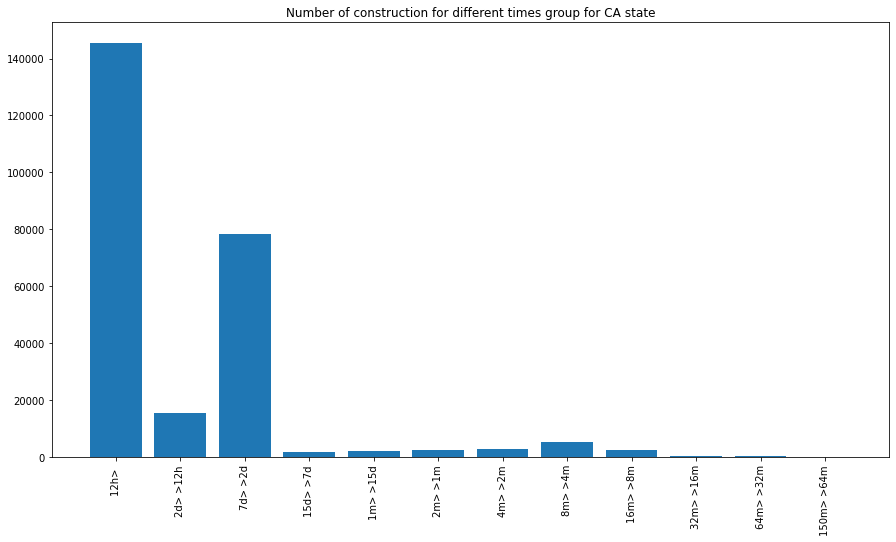

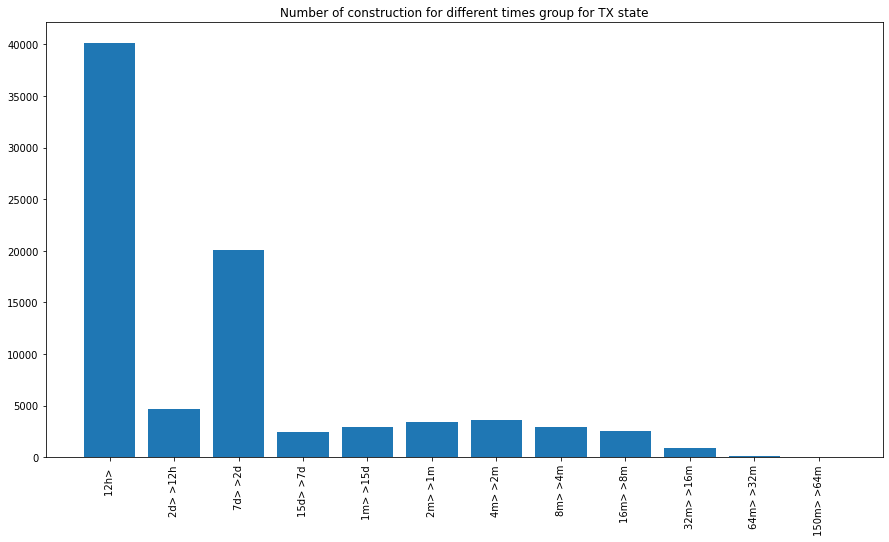

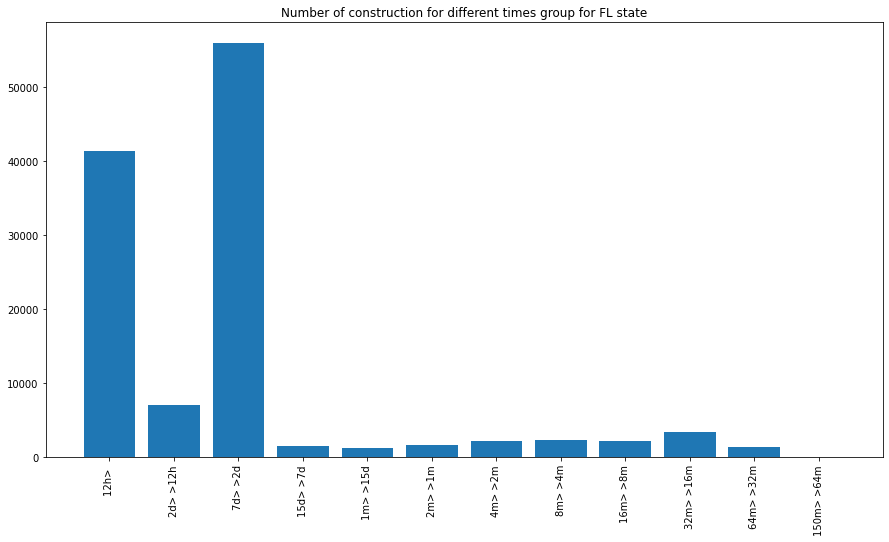

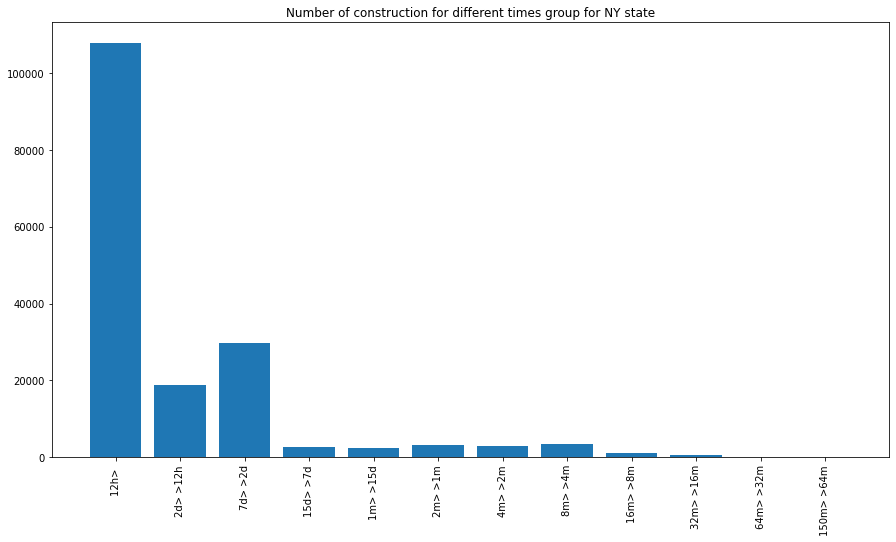

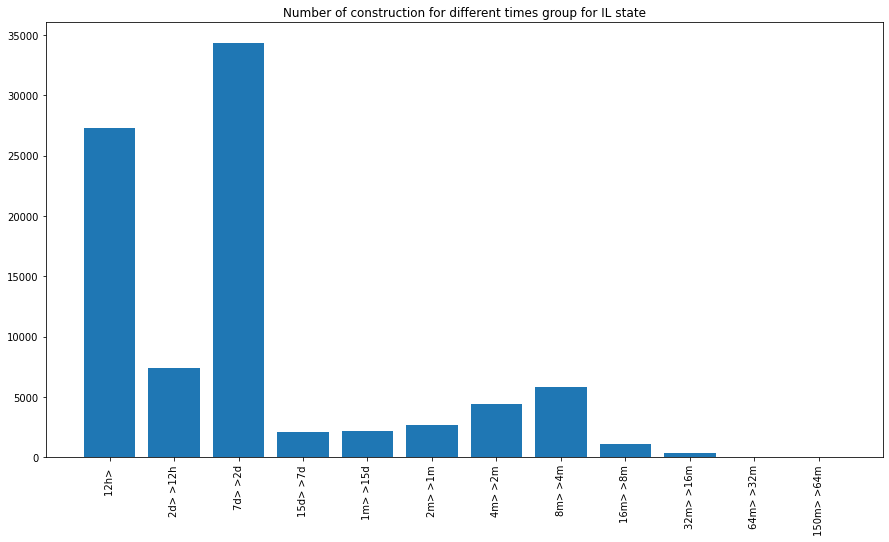

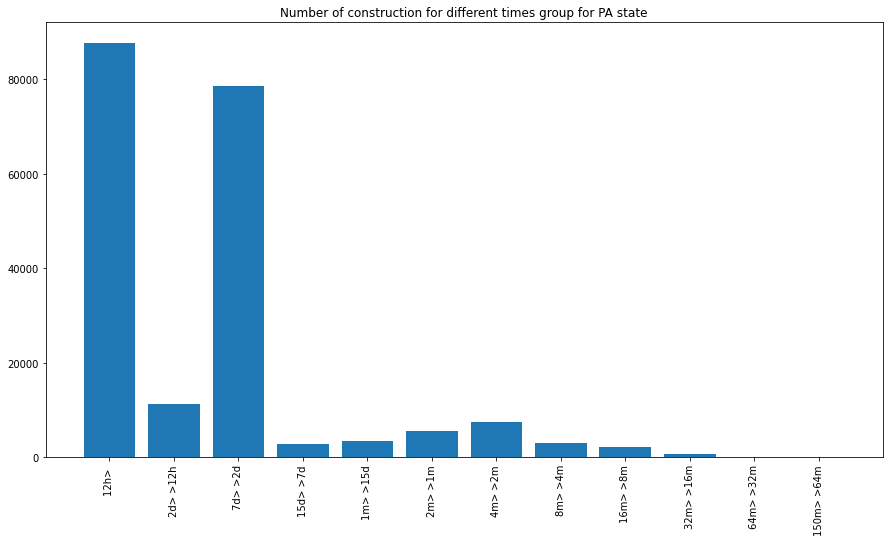

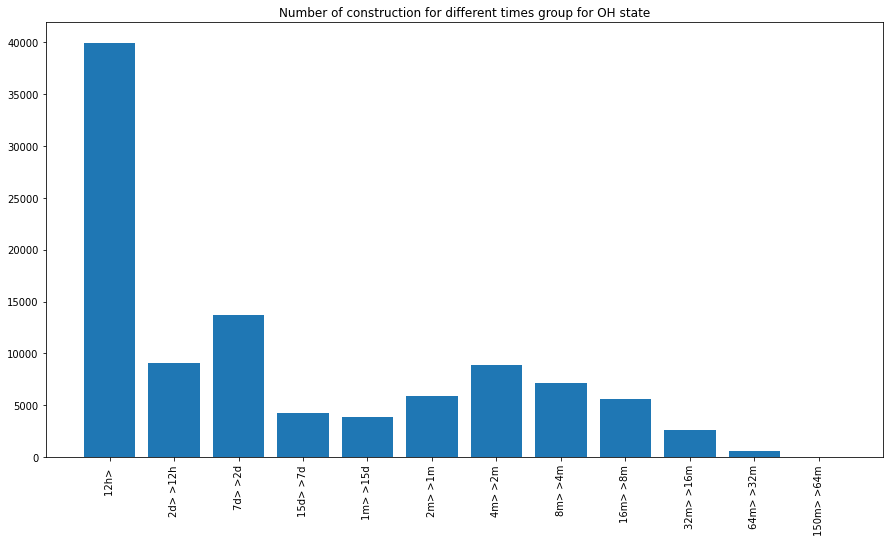

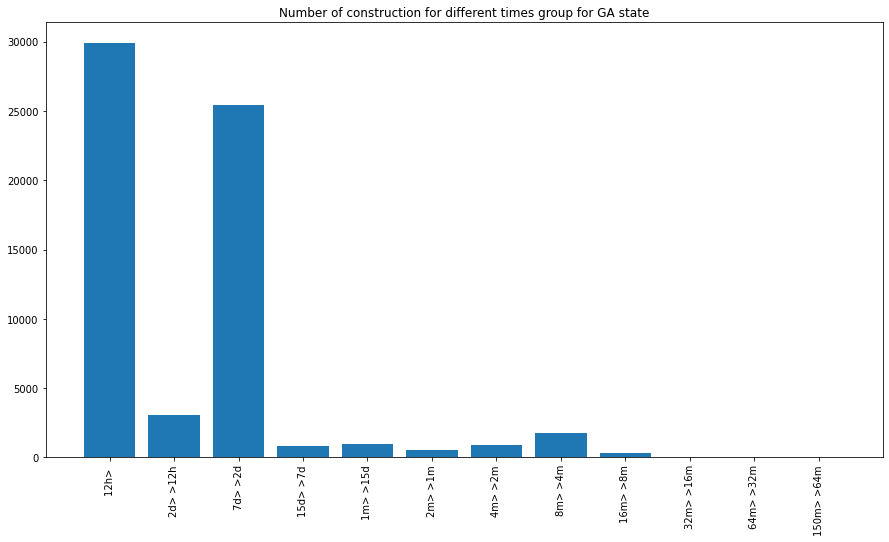

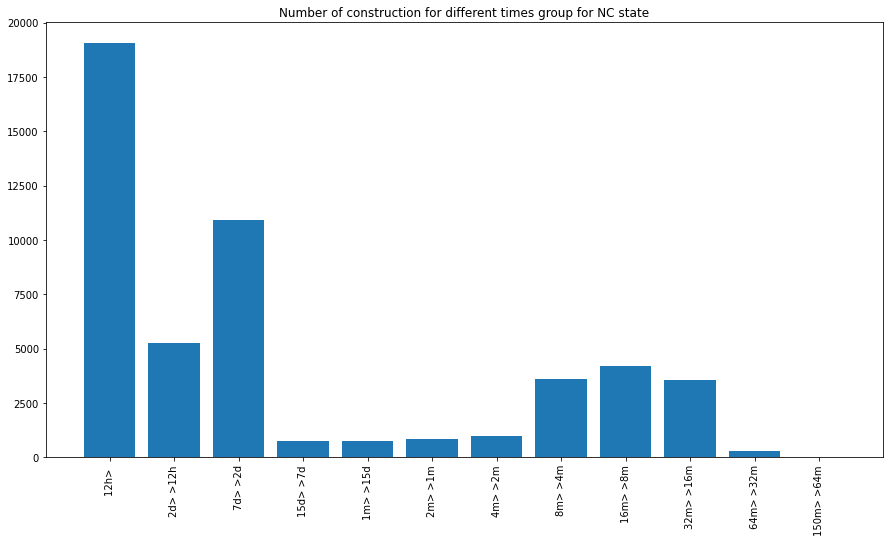

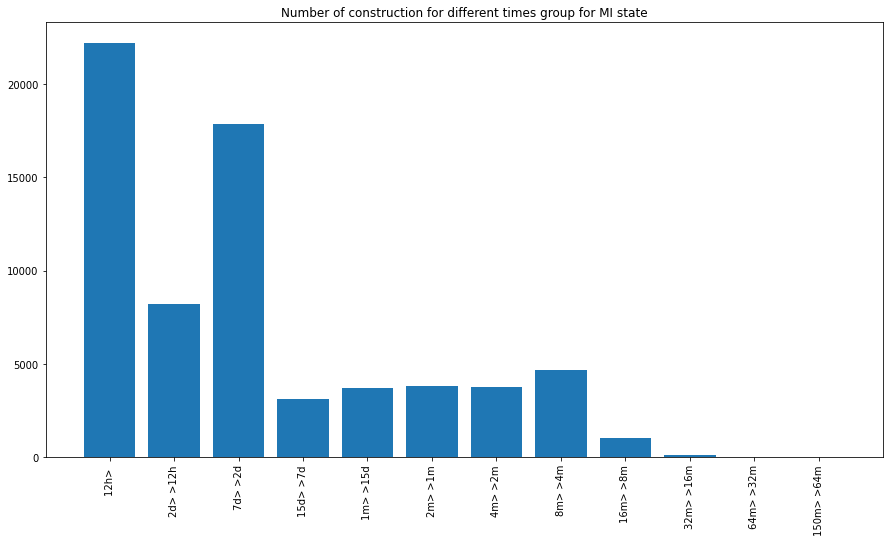

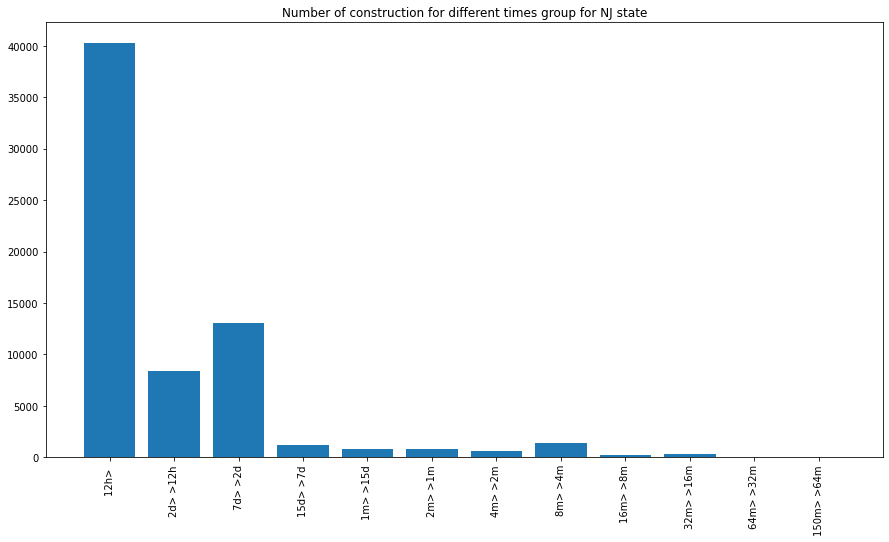

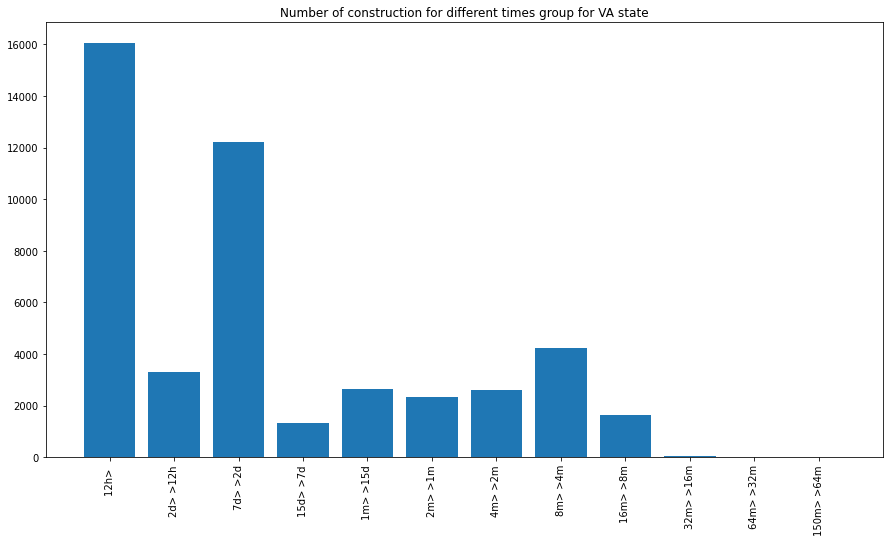

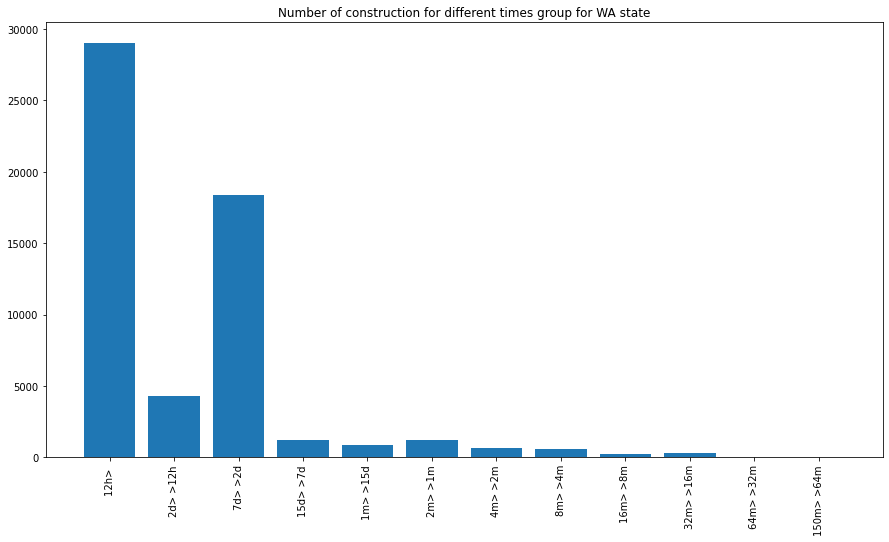

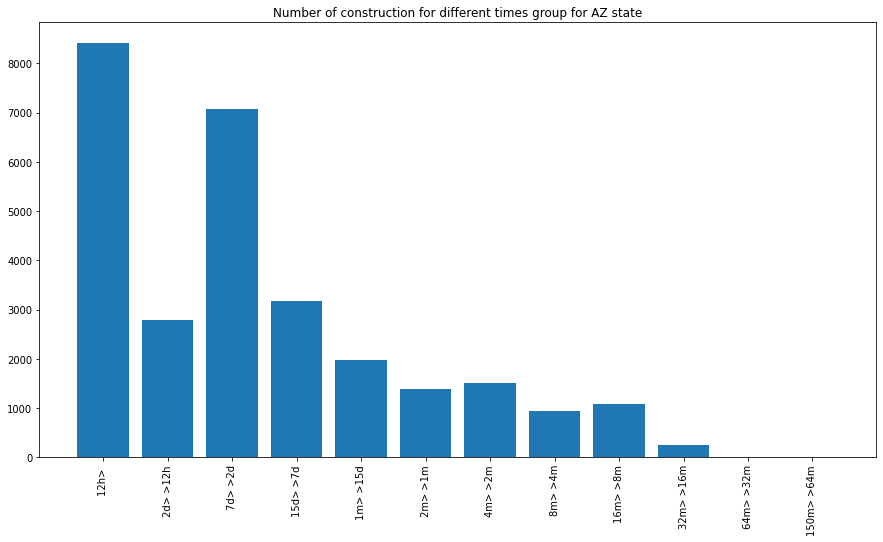

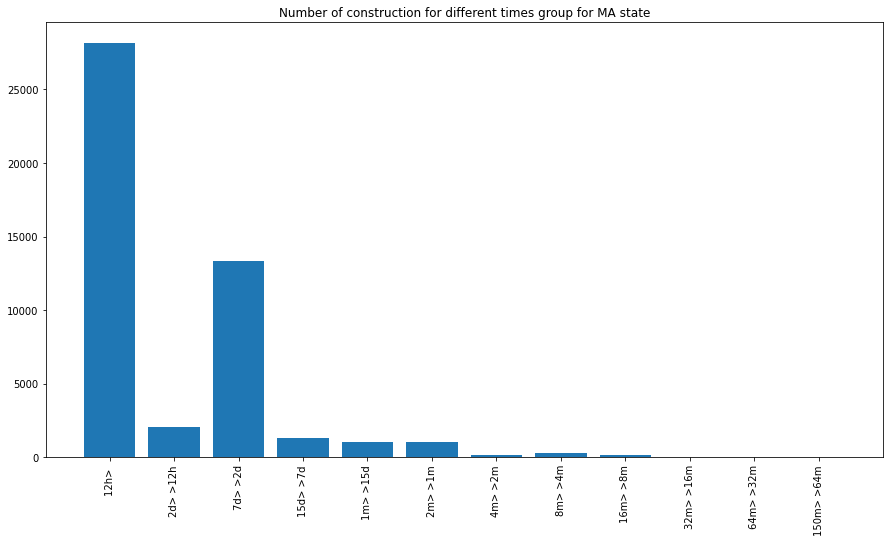

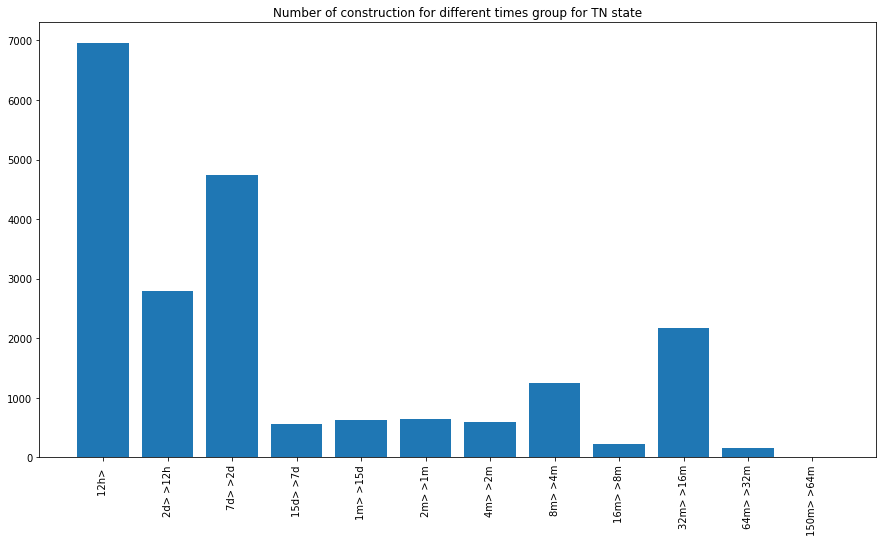

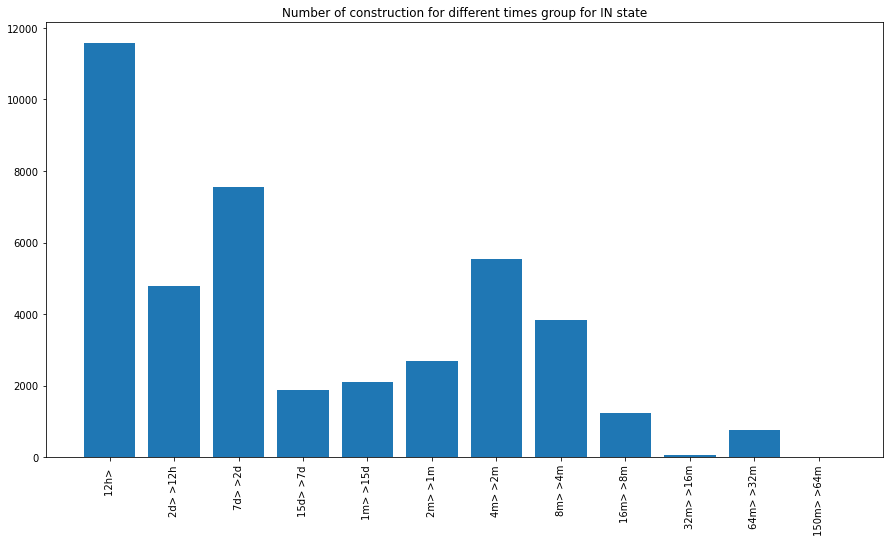

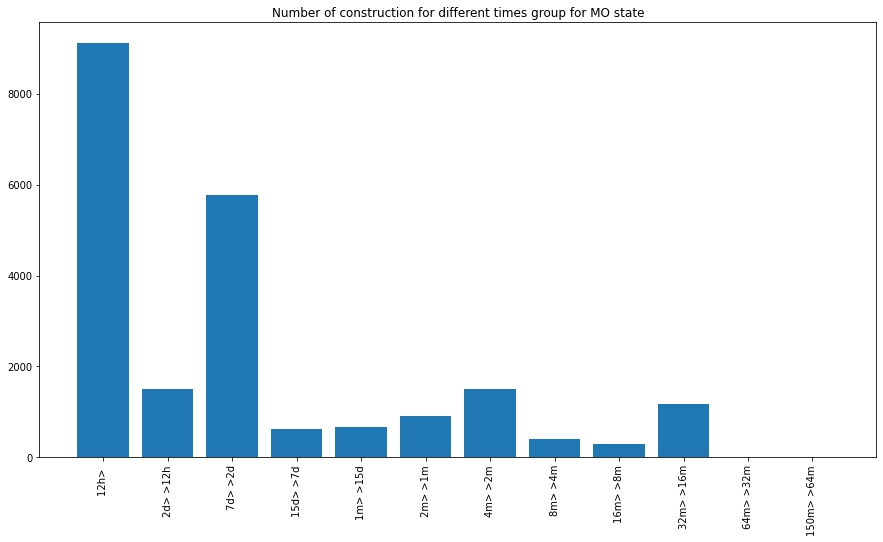

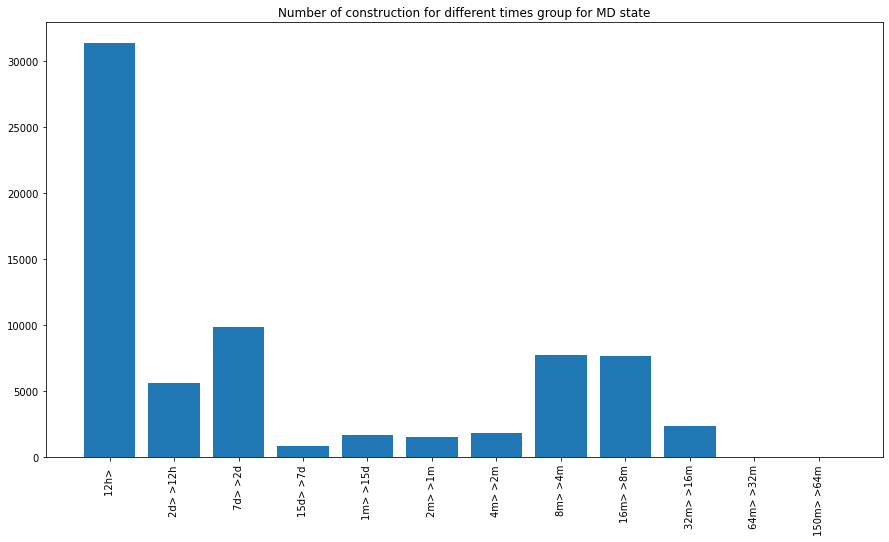

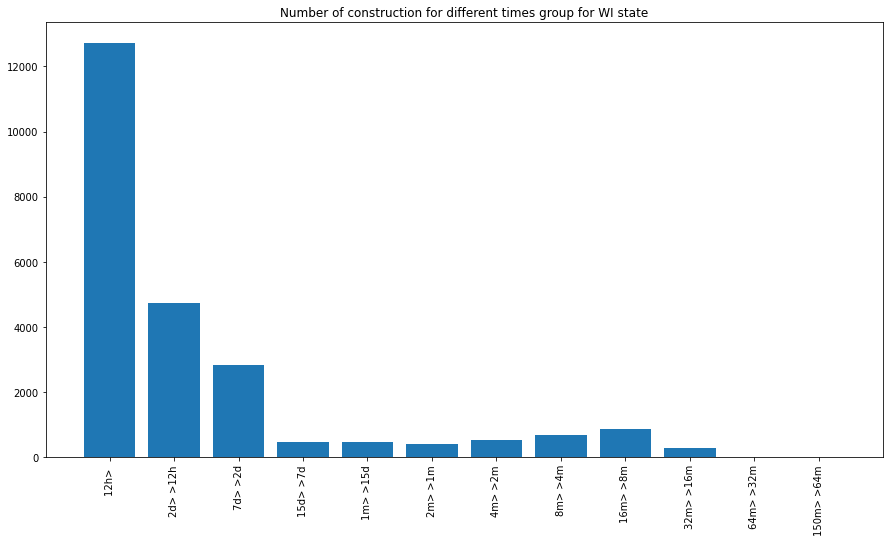

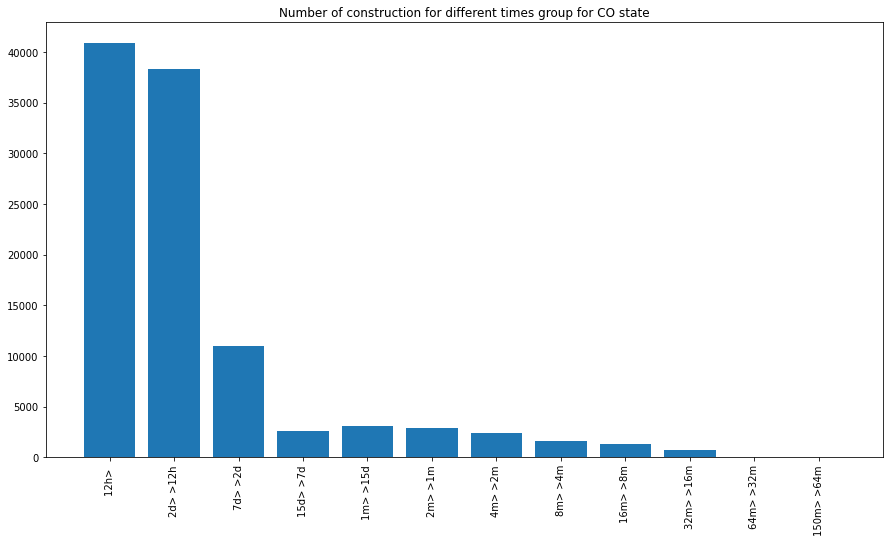

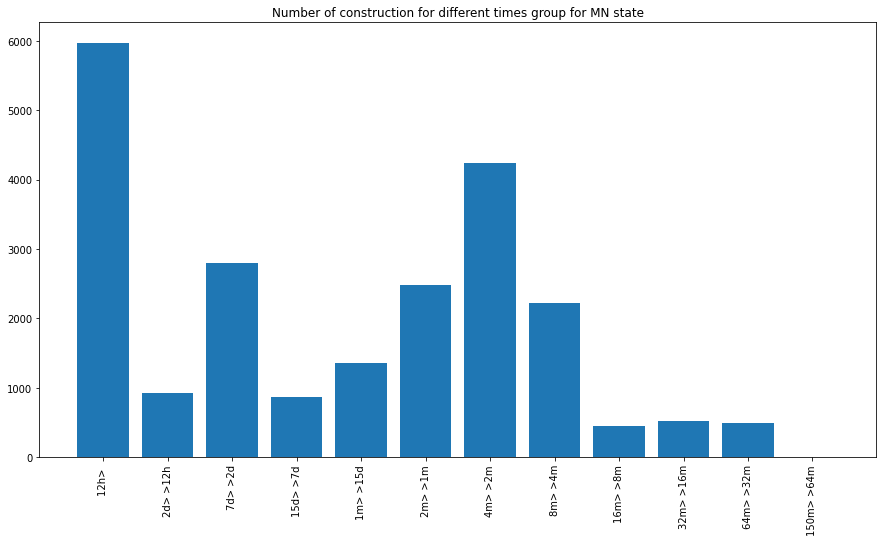

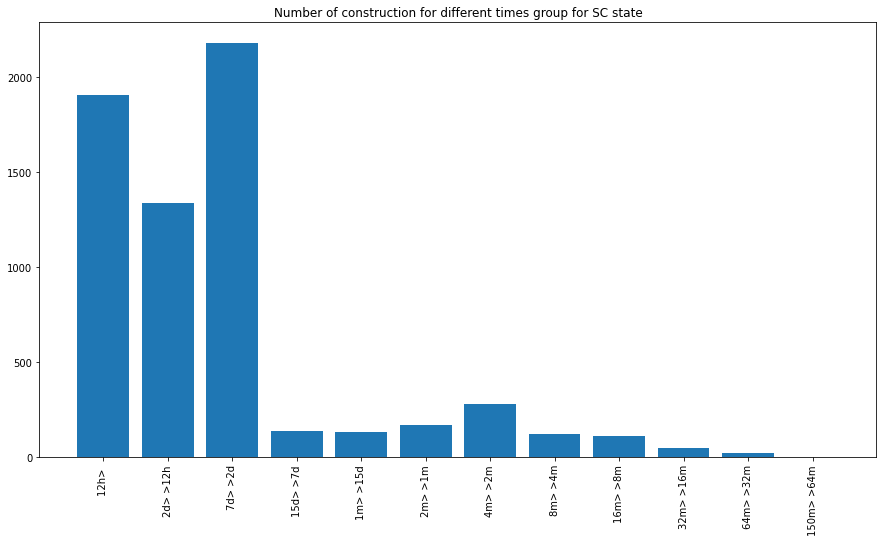

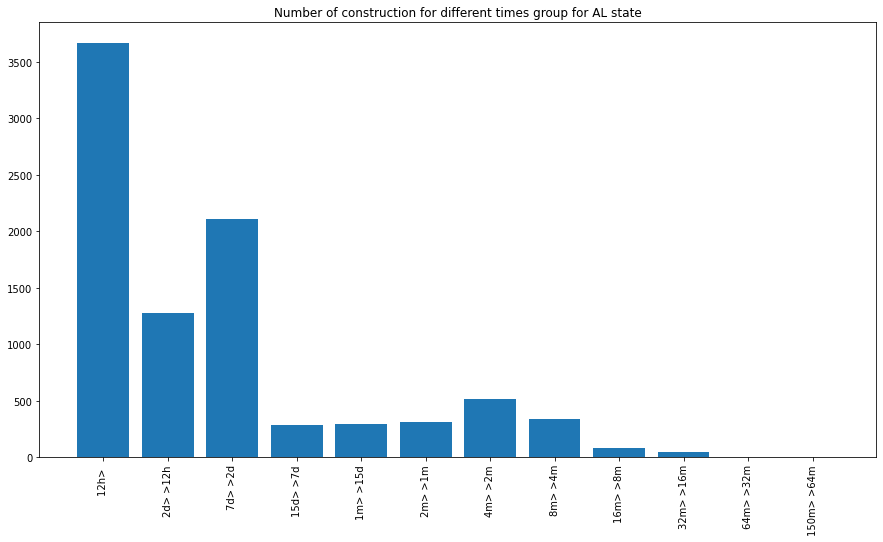

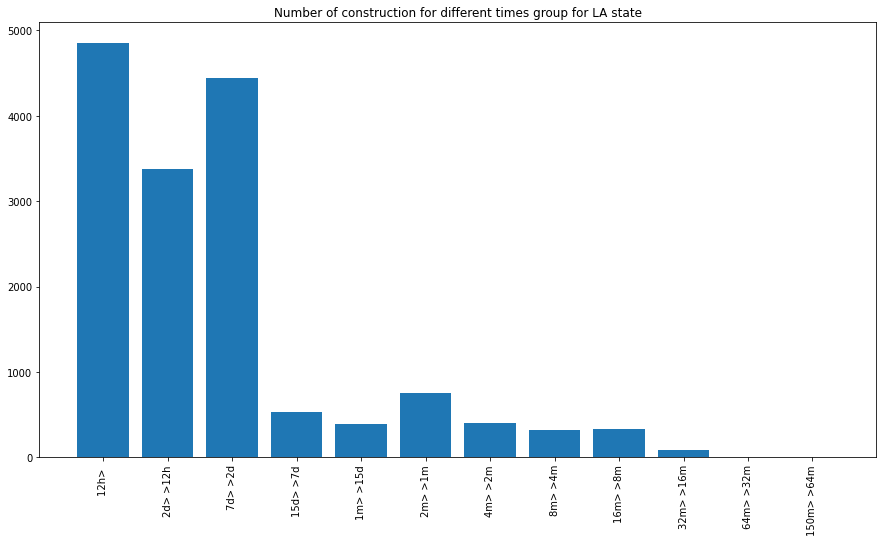

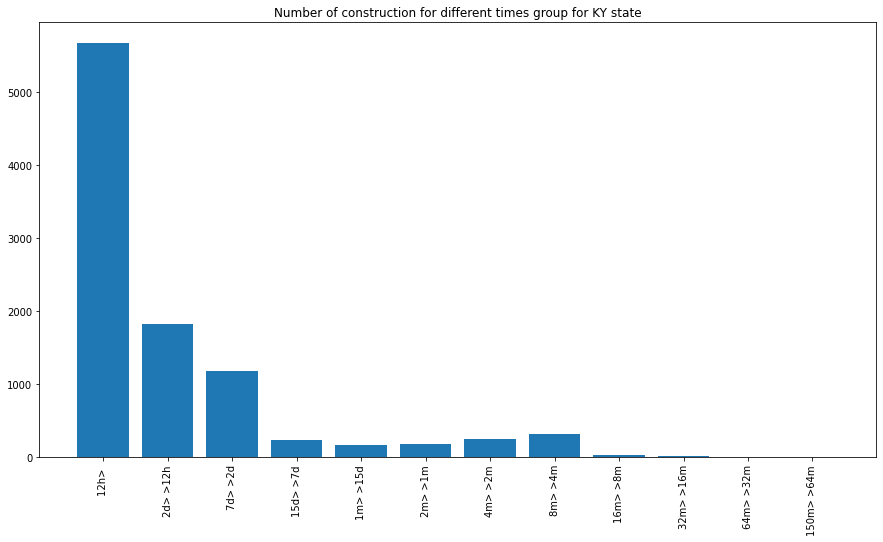

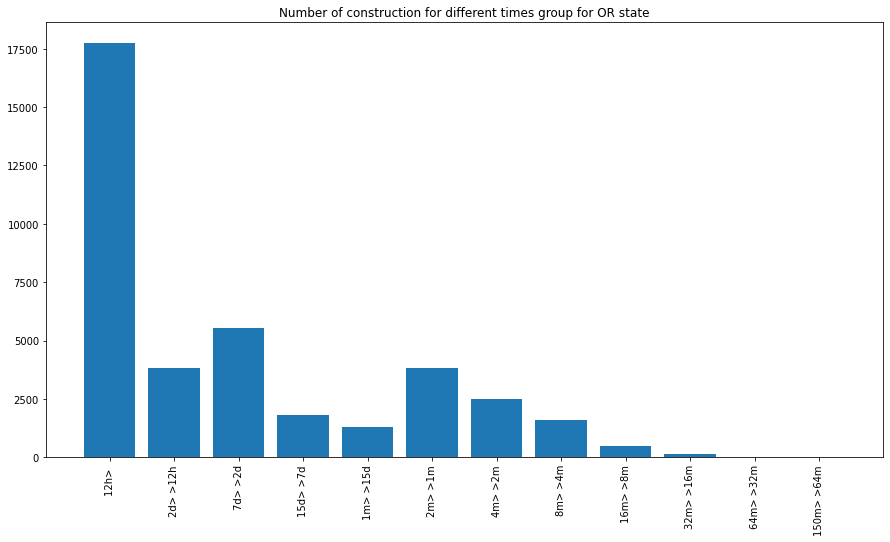

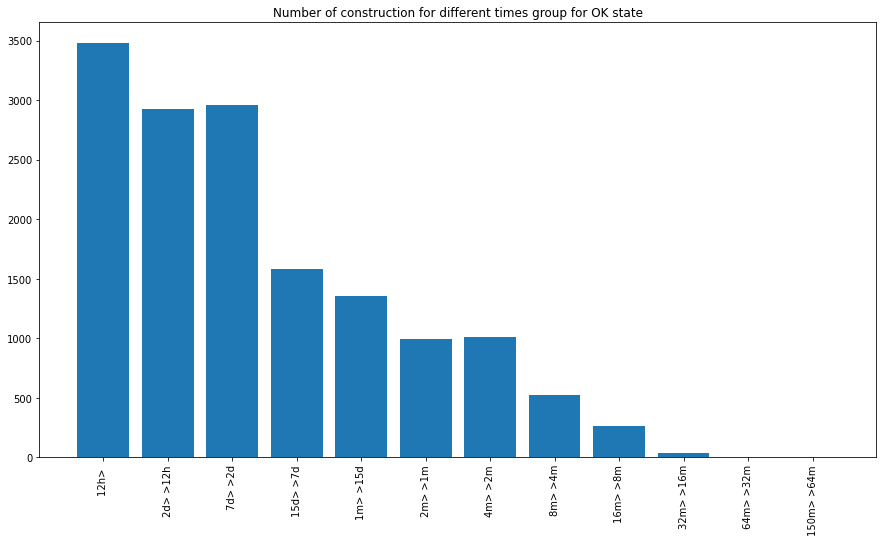

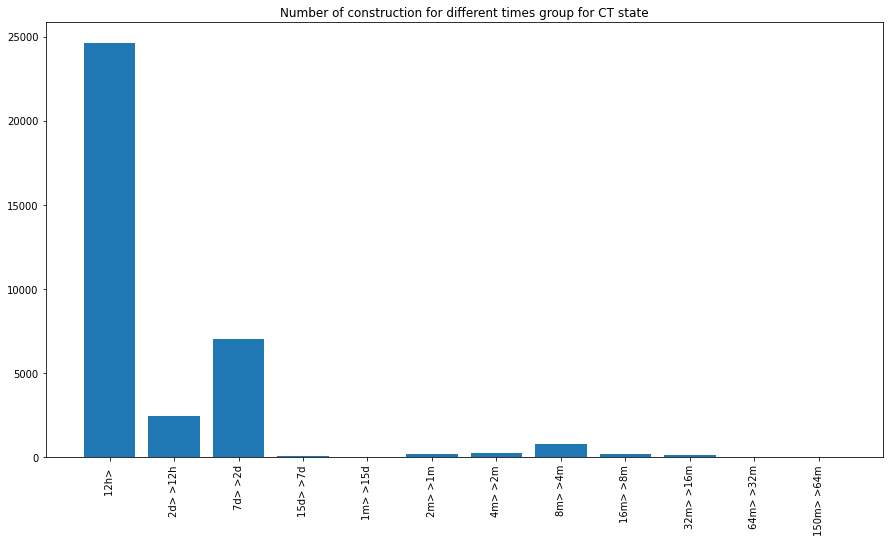

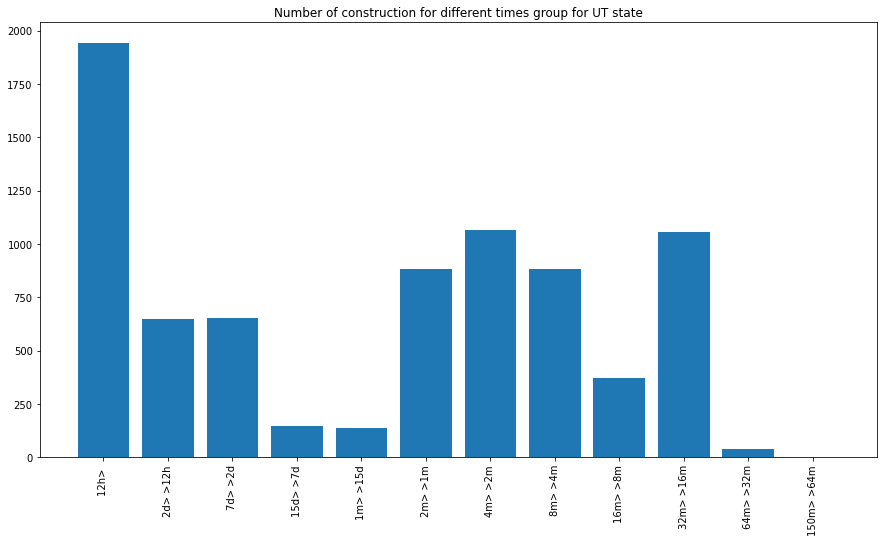

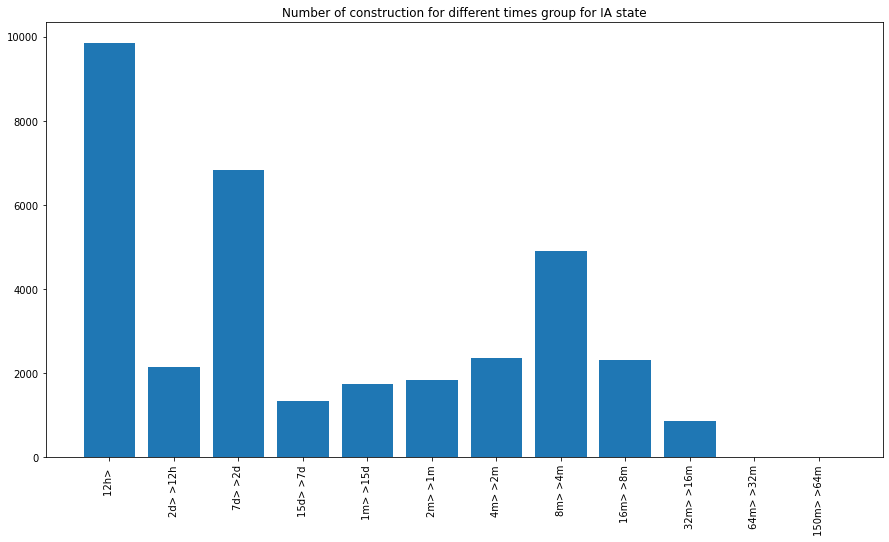

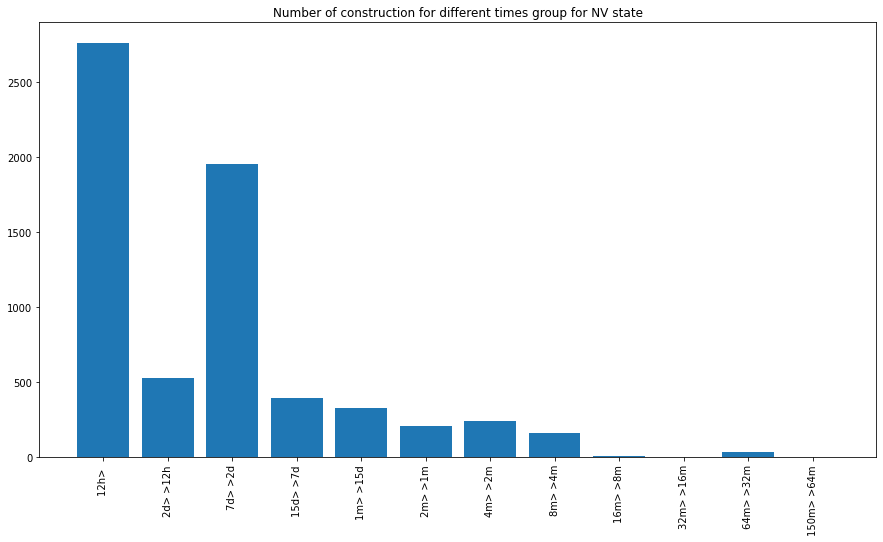

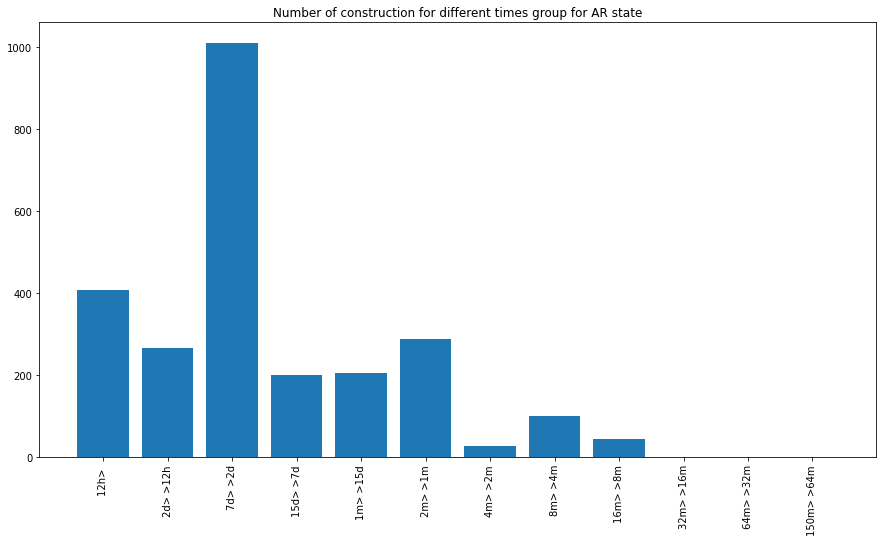

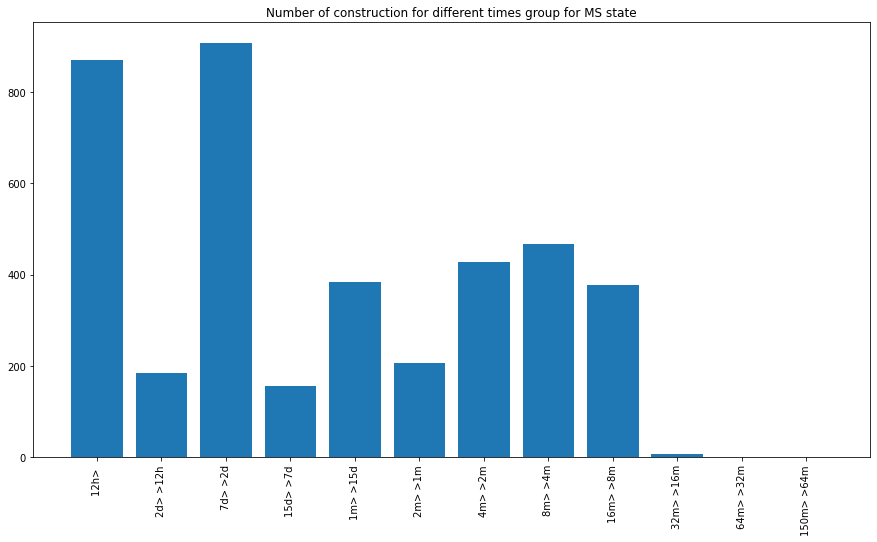

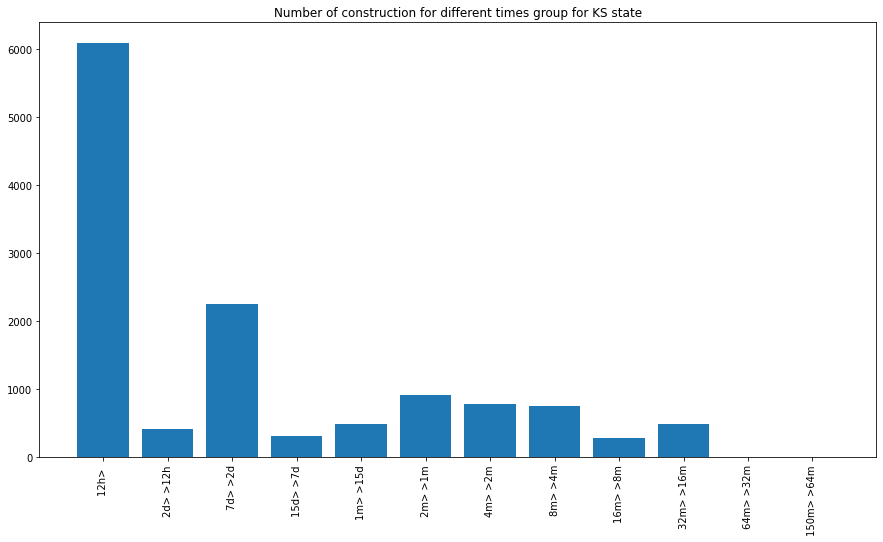

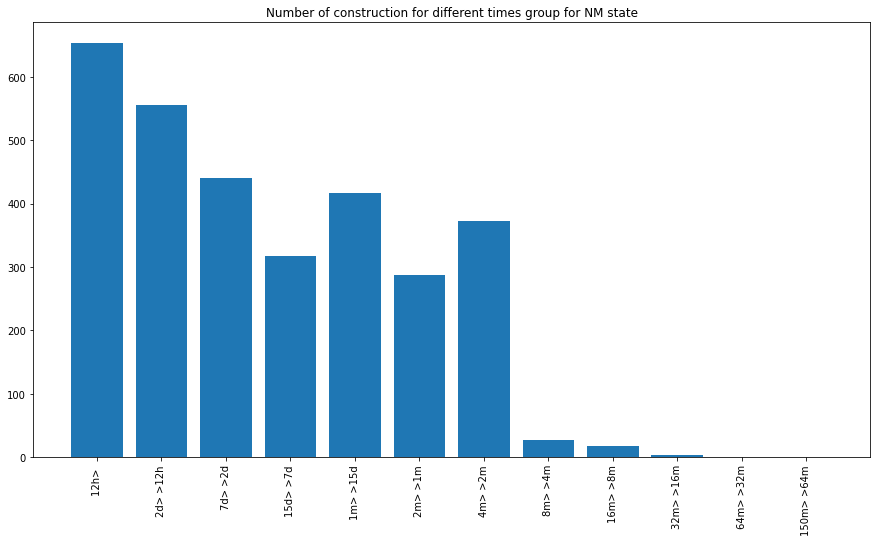

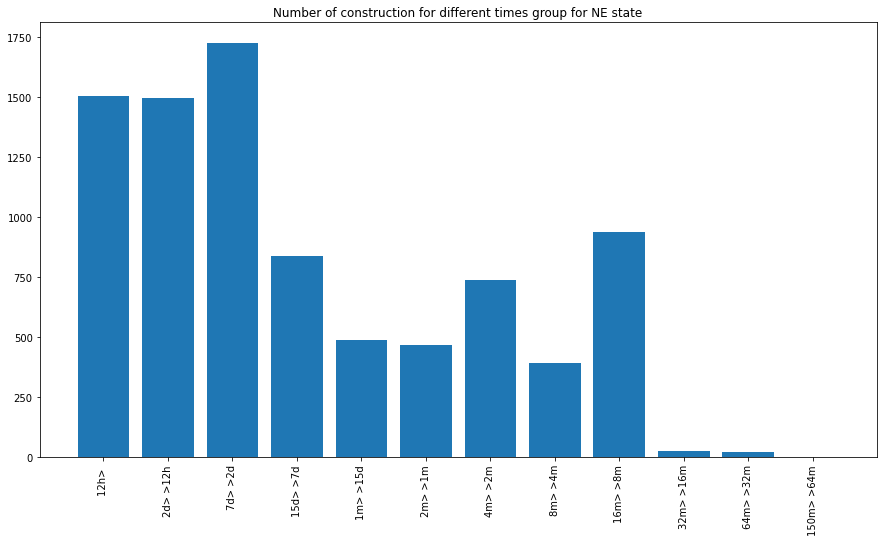

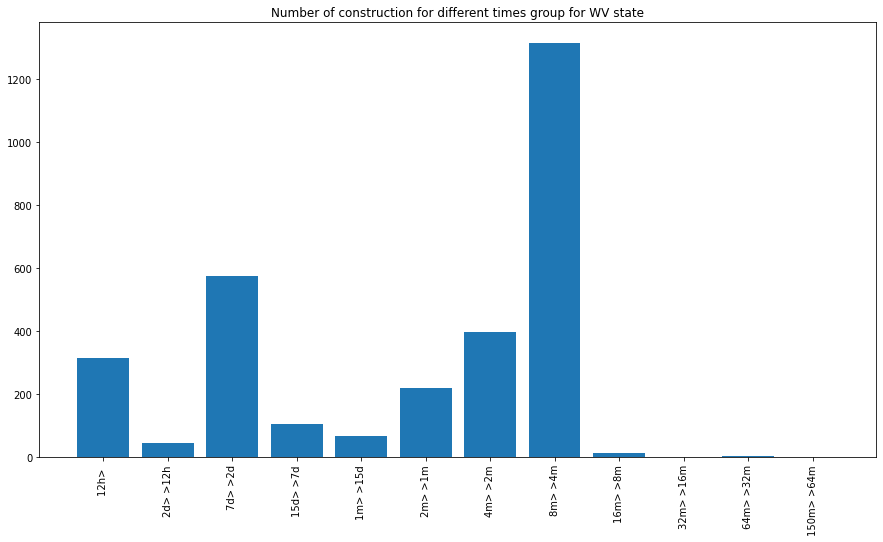

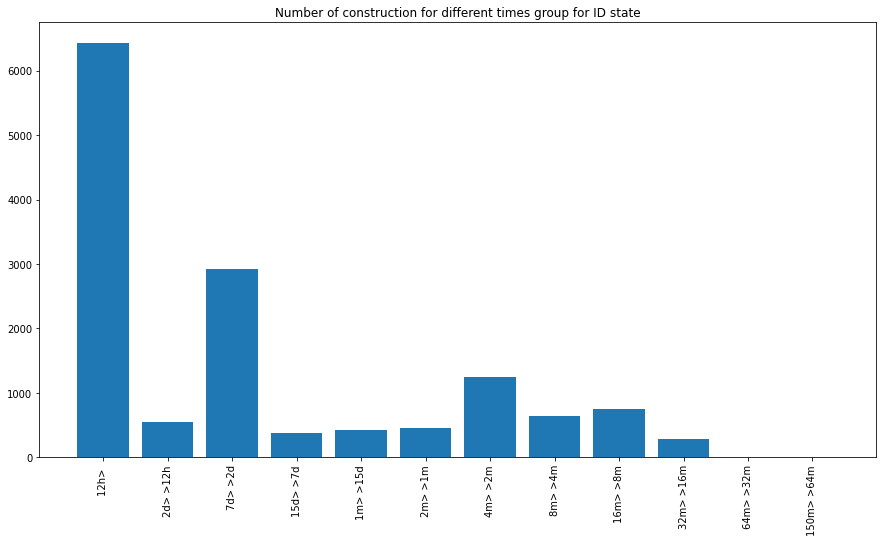

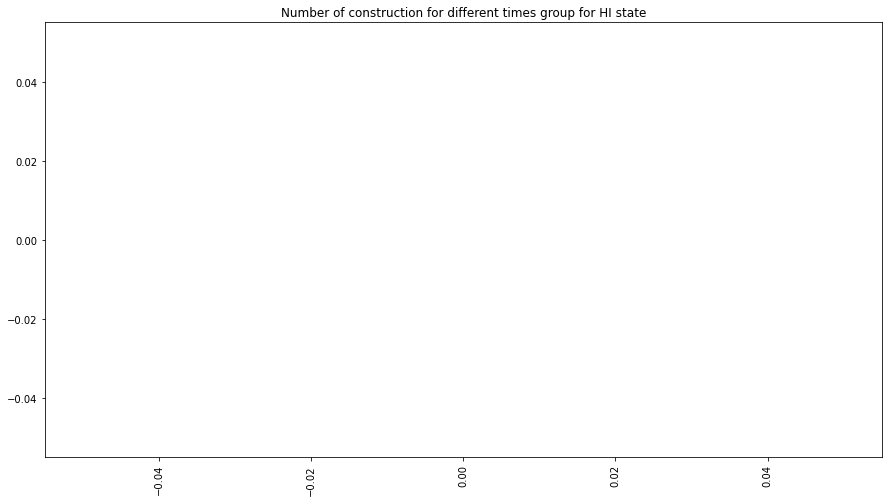

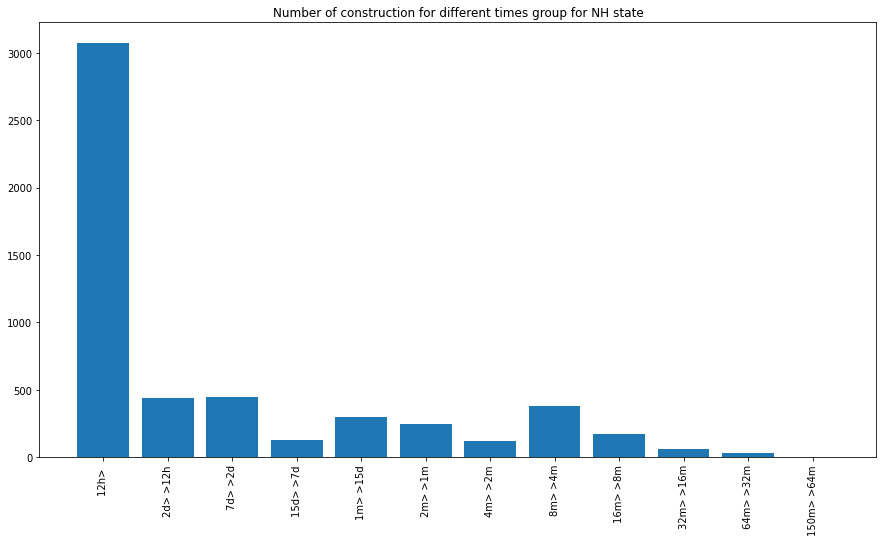

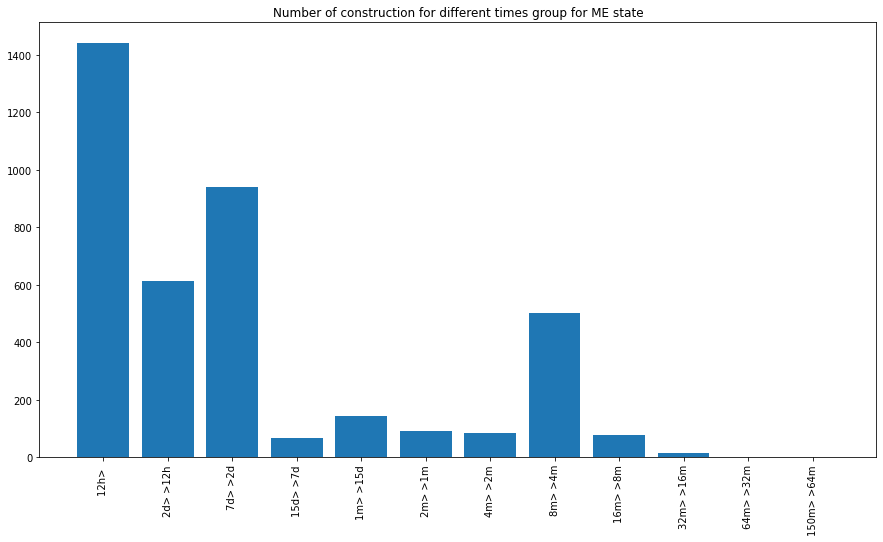

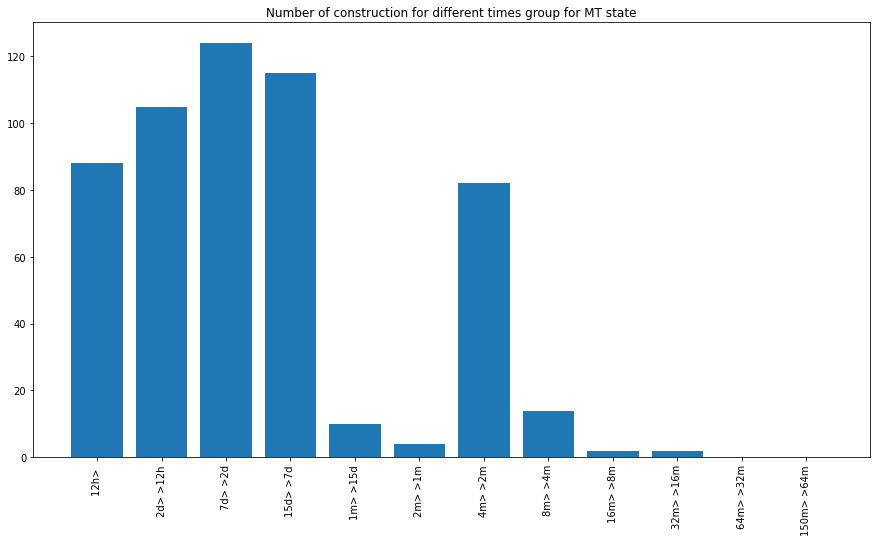

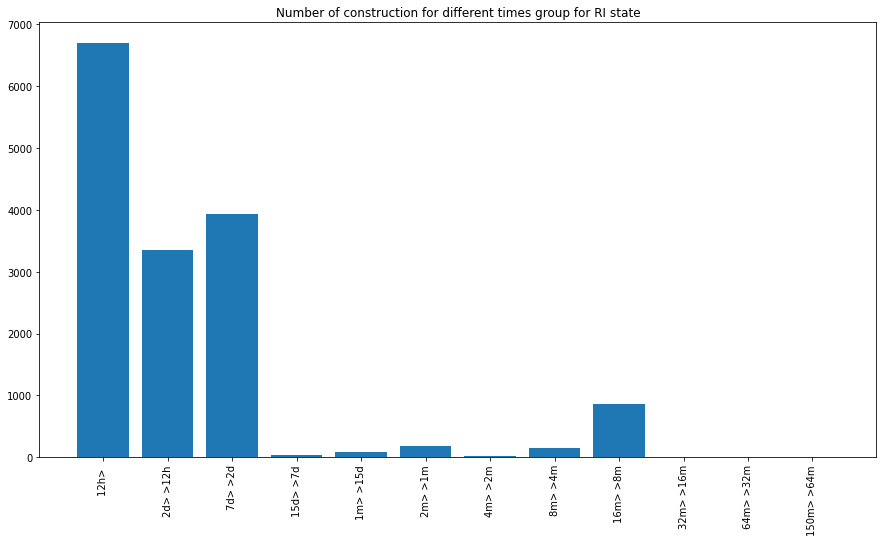

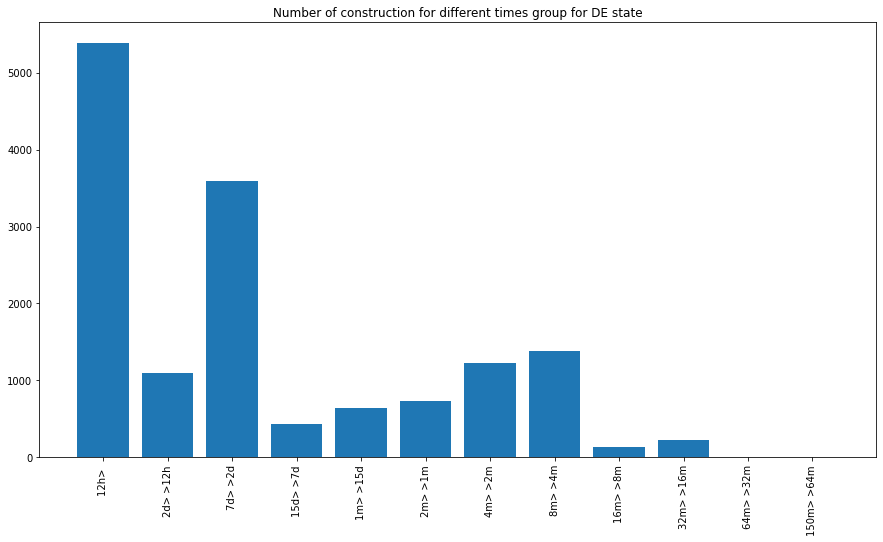

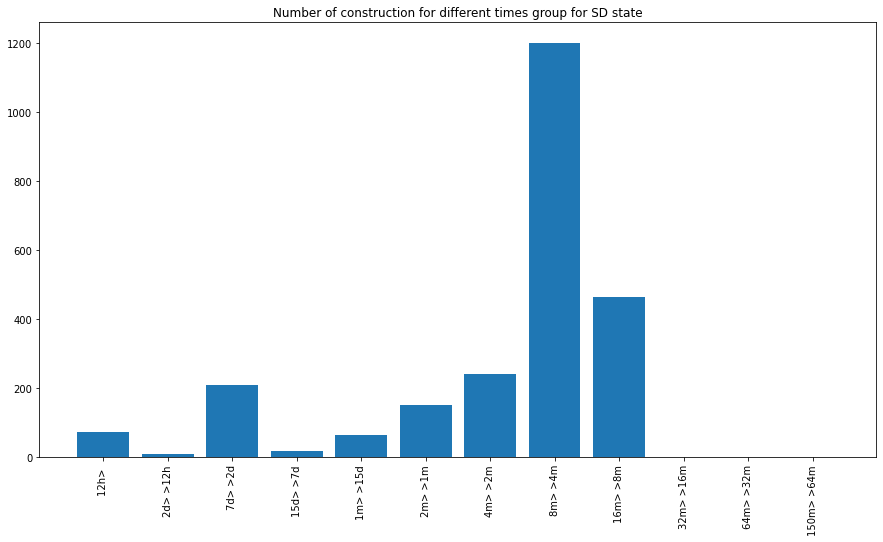

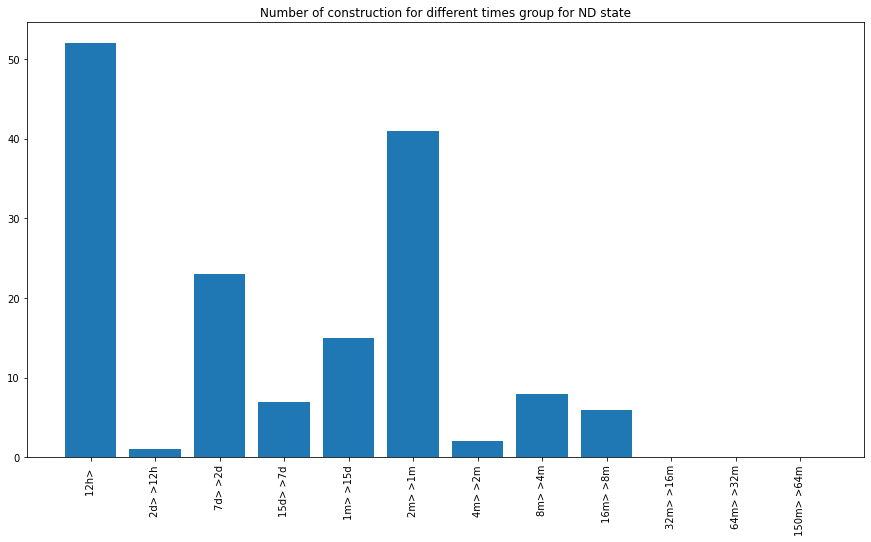

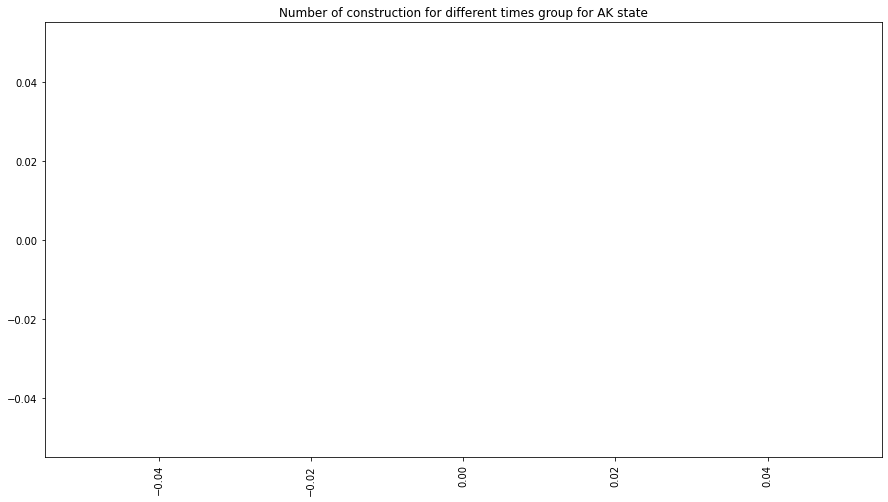

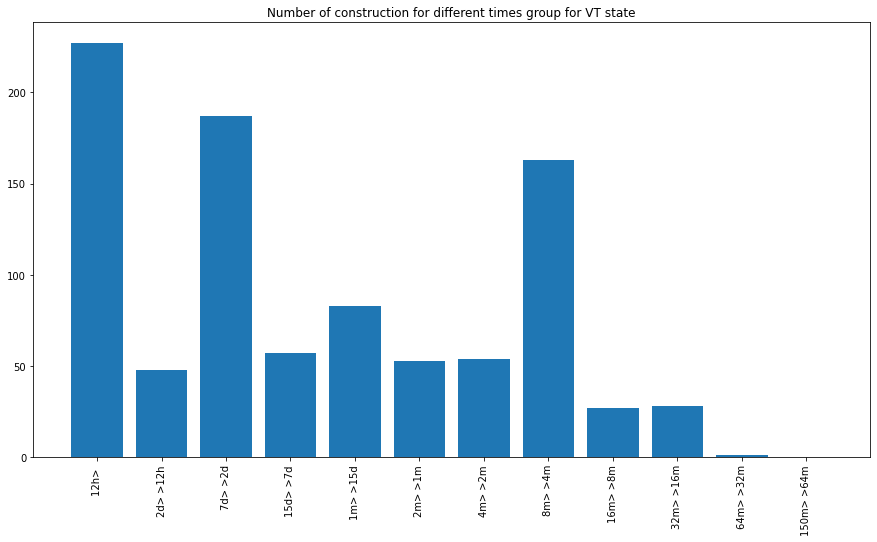

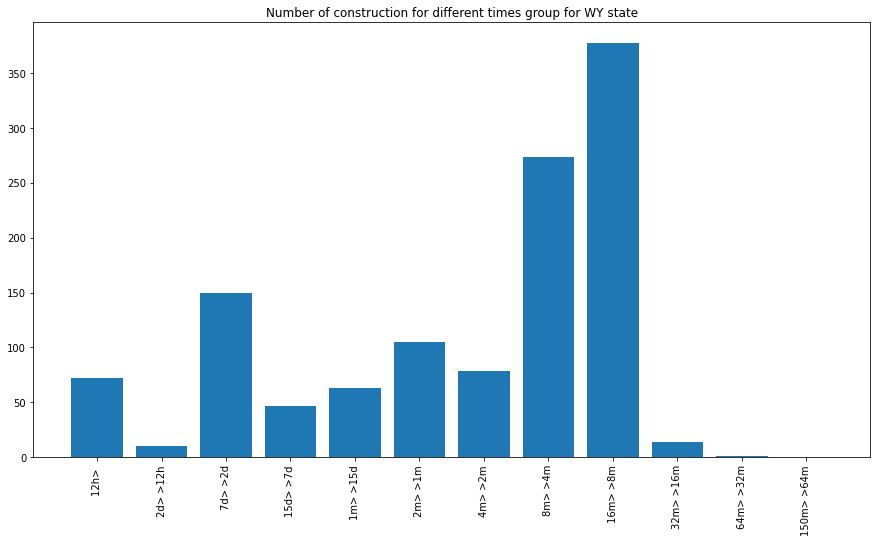

In [110]:
for state in States:
    print(state)
    plt.figure(figsize= (15,8))
    df_temp = df_filter_group_count[df_filter_group_count.State == state]
    plt.bar(x=df_temp['duration_group'], height=df_temp['counts'])
    a = plt.xticks(rotation = 90)
    plt.title("Number of construction for different times group for {} state".format(state))
    plt.savefig("Number-construction-different-times-group-{}-state.png".format(state))